# Multidimensional data in pandas
We have covered some pandas basics and learned how to plot. Now let's sort out how to deal with more complex data. We will often find ourselves with data in which the unit of observation is complex. Pandas helps us deal with this by allowing for many index variables. So far, we have only used single indexing, but that is about to change. 

Some examples that could use a multiIndex
1. State and country
2. Team and player
3. Industry and firm
4. Country (or person, firm,...) and time

That last one is important, and one that shows up a lot in economics. We call is *panel data*. Panel data is sometimes called longitudinal data. It follows the same firm/person/country over time. 

In [266]:
import pandas as pd                 # load pandas and shorten it to pd
import datetime as dt               # load datetime and shorten it to dt
import matplotlib.pyplot as plt     # for making figures

In [110]:
soccer = {'team' : ['Man City', 'Man City', 'Man City', 'Man City', 'Chelsea', 'Chelsea'], 
          'player' : ['Walker', 'Stones', 'Foden', 'Jesus', 'Cahill', 'Pedro'],
          'pos' : ['D', 'D', 'M', 'F', 'D', 'F'],
          'goals' : [1, 0, 0, 1, 0, 3],
          'assists': [0,0,0,0,0,0]
         }

prem = pd.DataFrame(soccer)
prem

,team,player,pos,goals,assists
0,Man City,Walker,D,1,0
1,Man City,Stones,D,0,0
2,Man City,Foden,M,0,0
3,Man City,Jesus,F,1,0
4,Chelsea,Cahill,D,0,0
5,Chelsea,Pedro,F,3,0


### Multiple indexing
The key to working with more complex datasets is getting the index right. So far, we have considered a single index, but pandas allows for multiple indexes that nest each other. 

**Key concept:** Hierarchical indexing takes multiple *levels* of indexes. 

Let's set up the DataFrame to take team and position as the indexes. 

In [111]:
prem.set_index(['team', 'pos'], inplace=True)
prem

player  goals  assists
team     pos                        
Man City D    Walker      1        0
         D    Stones      0        0
         M     Foden      0        0
         F     Jesus      1        0
Chelsea  D    Cahill      0        0
         F     Pedro      3        0

Wow. 

Notice that the `set_index()` method is the same one we used early with single indexes. In this case, we passed it a list of variables to make the indexes
```python
prem.set_index(['team', 'pos'], inplace=True)
```

In the output, the highest level of the index is team (we passed it 'team' first in the list) and the second level is position. The output does not repeat the team name for each observation. The 'missing' team name just mean that the team is the same as above. \[A very Tufte-esque removal of unnecessary ink.\] 

Let's take a look under the hood. What's our index? A new kind of object: the MultiIndex

In [112]:
print(prem.index)

MultiIndex(levels=[['Chelsea', 'Man City'], ['D', 'F', 'M']],
           labels=[[1, 1, 1, 1, 0, 0], [0, 0, 2, 1, 0, 1]],
           names=['team', 'pos'])


### Subsetting with multiple indexes
With a multi index, we need two arguments to reference observations

In [113]:
# All the defenders on Man City
prem.loc[('Man City', 'D'),:] 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


player  goals  assists
team     pos                        
Man City D    Walker      1        0
         D    Stones      0        0

It's always a good idea to pay attention to warnings, particularly 'PerformanceWarning'. Pandas is telling us that we are asking for something in the second index, but the second index is not ordered. Let's fix that with `sort_index()`.

**Important** Sort your mulitIndex. 

In [163]:
prem = prem.sort_index(axis=0)   # tell pandas which axis to sort. Could sort the columns, too...
                                 # returns a DataFrame unless we use inplace=True
prem

goals  assists
team     player pos                
Chelsea  Cahill D        0        0
         Pedro  F        3        0
Man City Foden  M        0        0
         Jesus  F        1        0
         Stones D        0        0
         Walker D        1        0

In [115]:
# Now let's ask for all the defenders on Man City
prem.loc[('Man City', 'D'), :]

player  goals  assists
team     pos                        
Man City D    Walker      1        0
         D    Stones      0        0

No warnings. 

### Partial indexing
With the indexes set, we can easily subset the data using only one of the indexes. In pandas, this is called *partial indexing* because we are only using part of the index to subset identify the data we want. 

We can use `loc[]` like we do with a single index if we want to index on the top level index.

In [116]:
print(prem.loc['Chelsea'])               # All the 'Chelsea' observations
print('\n')
print(prem.loc['Man City'])              # All the 'Man City' observations

     player  goals  assists
pos                        
D    Cahill      0        0
F     Pedro      3        0


     player  goals  assists
pos                        
D    Walker      1        0
D    Stones      0        0
F     Jesus      1        0
M     Foden      0        0


#### The xs() method
We can also use the `xs()` method. Here we specify which level we are looking into. Note that I can reference the levels either by an integer or by its name.

In [117]:
print(prem.xs('Chelsea', level = 0) )              # All the 'Chelsea' observations
print('\n')
print(prem.xs('Man City', level = 'team'))              # All the 'Man City' observations

     player  goals  assists
pos                        
D    Cahill      0        0
F     Pedro      3        0


     player  goals  assists
pos                        
D    Walker      1        0
D    Stones      0        0
F     Jesus      1        0
M     Foden      0        0


We can partially index on the 'inner index' as well. Suppose we want all the defenders, regardless of team.

In [118]:
prem.xs('D', level=1)

,player,goals,assists
team,,,
Chelsea,Cahill,0,0
Man City,Walker,1,0
Man City,Stones,0,0


As before, we can get rid of the index and replace it with a generic list of integers...

In [119]:
prem.reset_index(inplace=True)    # this moves the indexes back to columns
prem

,team,pos,player,goals,assists
0,Chelsea,D,Cahill,0,0
1,Chelsea,F,Pedro,3,0
2,Man City,D,Walker,1,0
3,Man City,D,Stones,0,0
4,Man City,F,Jesus,1,0
5,Man City,M,Foden,0,0


...and reset it with three levels of indexes!

In [120]:
prem.set_index(['team', 'player', 'pos'], inplace=True)
prem

goals  assists
team     player pos                
Chelsea  Cahill D        0        0
         Pedro  F        3        0
Man City Walker D        1        0
         Stones D        0        0
         Jesus  F        1        0
         Foden  M        0        0

#### A multiIndex in columns
There is nothing that says you can't have multiple indexes in the axis=1 dimension. Here is quick way to see this: transpose the DataFrame.

In [121]:
prem = prem.transpose()           #this swaps the rows for columns
print(prem)

team    Chelsea       Man City                   
player   Cahill Pedro   Walker Stones Jesus Foden
pos           D     F        D      D     F     M
goals         0     3        1      0     1     0
assists       0     0        0      0     0     0


Now the rows are named 'goals' and 'assists' and the columns are (team, player, pos). I'm not sure this is a very useful way to look at this particular dataset, but multiIndex columns can come in handy. Let's change it back.

In [122]:
prem = prem.transpose()
print(prem)

                     goals  assists
team     player pos                
Chelsea  Cahill D        0        0
         Pedro  F        3        0
Man City Walker D        1        0
         Stones D        0        0
         Jesus  F        1        0
         Foden  M        0        0


### Summary statistics by level
MultiIndexes provide a quick way to summarize data. We will see many different ways to do this --- getting statistics by group --- and not all will involve a multiIndex. 

In [198]:
# When subsetting by the upppermost level, I can use xs or loc
print('Chelsea avg. goals', prem.xs('Chelsea', level='team')['goals'].mean())   # average goals for Chelsea players
print('Chelsea avg. goals', prem.loc['Chelsea','goals'].mean())   # average goals for Chelsea players

# When subsetting on the inner levels, I use xs 
print('Defender avg. goals {0:.2f}.'.format( prem.xs('D', level='pos')['goals'].mean() ) )          # average goals for defenders

Chelsea avg. goals 1.5
Chelsea avg. goals 1.5
Defender avg. goals 0.33.


Notice the syntax with xs.
```python
 prem.xs('Chelsea', level='team')['goals']
```

The `prem.xs('Chelsea', level='team')` is returning a DataFrame with all the columns. 

We then use the usual square-bracket syntax to pick off just the column 'goals' and then hit with `mean()`


### Saving multiIndex DataFrames
Saving a multiIndexed DataFrame works like before. Pandas fills in all the repeated labels to the output is ready to go. Run the following code and then open the csv files.

In [105]:
# Multiple indexes on rows
prem.to_csv('prem.csv')

# Multiple indexes on columns
prem = prem.transpose()
prem.to_csv('prem_transposed.csv')

## Practice

Let's redo question \#3 on the exam using multiIndexes.  

1. Load the march cps data, 'CPS_March_2016.csv'. Remember, missing values are '.'

In [186]:
cps = pd.read_csv('CPS_March_2016.csv',na_values = '.')

cps.head(20)

,hrwage,educ,female,fulltimely
0,20.961538,Some college,0,1.0
1,20.192308,HS diploma/GED,1,1.0
2,6.410256,Some college,0,0.0
3,NaN,Less than HS,0,NaN
4,NaN,Some college,0,NaN
5,NaN,HS diploma/GED,1,NaN
6,14.285714,HS diploma/GED,1,1.0
7,0.000000,Some college,0,0.0
8,NaN,HS diploma/GED,1,NaN
9,NaN,College degree,0,NaN


2. Keep only those with `fulltimely == 1`
3. Keep only those with `5< =hrwage <=200`

In [187]:
# Keep individuals who worked full time last year:
cps = cps[cps['fulltimely'] == 1]

# Keep individuals with wages between $5 and $200.
cps = cps[cps['hrwage'] <= 200]
cps = cps[cps['hrwage'] >= 5]

4. Rename 'female' to 'sex'
5. In column 'sex' replace 0 with 'male' and 1 with 'female'

In [188]:
cps.rename(columns={'female':'sex'}, inplace=True)
cps.loc[cps['sex']==0, 'sex'] = 'male'
cps.loc[cps['sex']==1, 'sex'] = 'female'
cps.head(20)

,hrwage,educ,sex,fulltimely
0,20.961538,Some college,male,1.0
1,20.192308,HS diploma/GED,female,1.0
6,14.285714,HS diploma/GED,female,1.0
10,18.269230,Some college,female,1.0
12,59.523810,Graduate degree,male,1.0
13,18.367348,College degree,female,1.0
14,8.653846,HS diploma/GED,male,1.0
15,59.136210,Graduate degree,male,1.0
21,19.711538,College degree,male,1.0
22,22.349272,College degree,female,1.0


6. Set the index to 'sex' and 'educ', in that order.
7. Sort the index. 

In [189]:
cps.set_index(['sex', 'educ'], inplace=True)
cps.sort_index(axis=0, inplace = True)

cps.head(20)

hrwage  fulltimely
sex    educ                                 
female College degree  18.367348         1.0
       College degree  22.349272         1.0
       College degree  18.269230         1.0
       College degree  43.269230         1.0
       College degree  19.230770         1.0
       College degree  22.596153         1.0
       College degree  29.807692         1.0
       College degree  22.596153         1.0
       College degree  15.277778         1.0
       College degree  18.571428         1.0
       College degree  17.211538         1.0
       College degree  24.038462         1.0
       College degree  21.634615         1.0
       College degree  18.589743         1.0
       College degree  16.239317         1.0
       College degree   5.769231         1.0
       College degree  25.641026         1.0
       College degree  27.777779         1.0
       College degree  15.384615         1.0
       College degree  16.025640         1.0

8. Report the average wage for males and females. Try it with the `loc[]` method. 

In [190]:
avg_wage_f = cps.loc['female', 'hrwage'].mean()
avg_wage_m = cps.loc['male', 'hrwage'].mean()

print('Average wage of females is ${0:.2f} and males is ${1:.2f}.'.format(avg_wage_f, avg_wage_m) )


Average wage of females is $22.75 and males is $28.31.


9. Report the average wage for `HS diploma/GED` and for `College degree`, regardless of sex. Use the `xs()` method.  

In [197]:
avg_wage_high = cps.xs('HS diploma/GED', level='educ')['hrwage'].mean()
avg_wage_coll = cps.xs('College degree', level='educ')['hrwage'].mean()

print('Average wage of those with high school degrees is is ${0:.2f} and those with a college degree is ${1:.2f}.'.format(avg_wage_high, avg_wage_coll) )

Average wage of those with high school degrees is is $19.11 and those with a college degree is $31.96.


## Panel data

In [203]:
# load a data file with the number of walks and snacks my dogs have had 
dogs = pd.read_csv('dogs.csv')         # data on the habits of my dogs
dogs


,dog,var,time,value
0,Buster,walk,Monday,2
1,Buster,walk,Tuesday,2
2,Buster,walk,Wednesday,1
3,Buster,snacks,Monday,4
4,Buster,snacks,Tuesday,3
5,Buster,snacks,Wednesday,4
6,Buster,snacks,Thursday,5
7,Su,walk,Monday,2
8,Su,walk,Tuesday,2
9,Su,walk,Wednesday,2


This data format is called **long** because there are lots of rows and not many columns. Moving between long and **wide** (lots of columns, fewer rows) is a common task in setting up panel data sets. 

Pandas calls long data **stacked** and wide data **unstacked**. We use the `stack()` and `unstack()` methods for moving between long and wide with multiIndexed data. Stack and unstack do not work in place. They always return a copy, so we need to assign it to variables.

In [204]:
# move everything but the data values to the index
dogs = dogs.set_index(['dog', 'time', 'var'], inplace=False)
dogs

value
dog    time      var          
Buster Monday    walk        2
       Tuesday   walk        2
       Wednesday walk        1
       Monday    snacks      4
       Tuesday   snacks      3
       Wednesday snacks      4
       Thursday  snacks      5
Su     Monday    walk        2
       Tuesday   walk        2
       Wednesday walk        2
       Monday    snacks      3
       Tuesday   snacks      4
       Wednesday snacks      4
       Thursday  snacks      3

We **unstack the data** to put the variables into columns. 

In [212]:
dogs_us = dogs.unstack('var')
dogs_us


value     
var              snacks walk
dog    time                 
Buster Monday       4.0  2.0
       Thursday     5.0  NaN
       Tuesday      3.0  2.0
       Wednesday    4.0  1.0
Su     Monday       3.0  2.0
       Thursday     3.0  NaN
       Tuesday      4.0  2.0
       Wednesday    4.0  2.0

We can unstack several variables. As usual, we pass a list. 

In [213]:
dogs_us = dogs.unstack(['dog', 'var'])
dogs_us

value                   
dog       Buster          Su       
var         walk snacks walk snacks
time                               
Monday       2.0    4.0  2.0    3.0
Thursday     NaN    5.0  NaN    3.0
Tuesday      2.0    3.0  2.0    4.0
Wednesday    1.0    4.0  2.0    4.0

We now have an unstacked DataFrame and each column is a time series of one dog's observations. 

Notice that we do not have observations for Thursday's walks, so panda filled in NaNs for us. 

We can **stack the data** to put the variables back on the rows. 

When we unstack the data, pandas defaults to dropping the NaNs. We can override this if we choose. If we do not pass an argument, it stacks the innermost index. 

In [220]:
dogs_s = dogs_us.stack()       # stack shifts the columns to rows. 
dogs_s

value     
dog              Buster   Su
time      var               
Monday    snacks    4.0  3.0
          walk      2.0  2.0
Thursday  snacks    5.0  3.0
Tuesday   snacks    3.0  4.0
          walk      2.0  2.0
Wednesday snacks    4.0  4.0
          walk      1.0  2.0

In [221]:
dogs_s = dogs_us.stack(['dog', 'var'], dropna=False)
dogs_s

value
time      dog    var          
Monday    Buster snacks    4.0
                 walk      2.0
          Su     snacks    3.0
                 walk      2.0
Thursday  Buster snacks    5.0
                 walk      NaN
          Su     snacks    3.0
                 walk      NaN
Tuesday   Buster snacks    3.0
                 walk      2.0
          Su     snacks    4.0
                 walk      2.0
Wednesday Buster snacks    4.0
                 walk      1.0
          Su     snacks    4.0
                 walk      2.0

In [222]:
dogs_s=dogs_s.swaplevel('dog', 'time')
dogs_s

value
dog    time      var          
Buster Monday    snacks    4.0
                 walk      2.0
Su     Monday    snacks    3.0
                 walk      2.0
Buster Thursday  snacks    5.0
                 walk      NaN
Su     Thursday  snacks    3.0
                 walk      NaN
Buster Tuesday   snacks    3.0
                 walk      2.0
Su     Tuesday   snacks    4.0
                 walk      2.0
Buster Wednesday snacks    4.0
                 walk      1.0
Su     Wednesday snacks    4.0
                 walk      2.0

In [223]:
dogs_s=dogs_s.swaplevel('var', 'time')
dogs_s

value
dog    var    time            
Buster snacks Monday       4.0
       walk   Monday       2.0
Su     snacks Monday       3.0
       walk   Monday       2.0
Buster snacks Thursday     5.0
       walk   Thursday     NaN
Su     snacks Thursday     3.0
       walk   Thursday     NaN
Buster snacks Tuesday      3.0
       walk   Tuesday      2.0
Su     snacks Tuesday      4.0
       walk   Tuesday      2.0
Buster snacks Wednesday    4.0
       walk   Wednesday    1.0
Su     snacks Wednesday    4.0
       walk   Wednesday    2.0

In [226]:
dogs_s.sort_index(inplace=True)
dogs_s

value
dog    var    time            
Buster snacks Monday       4.0
              Thursday     5.0
              Tuesday      3.0
              Wednesday    4.0
       walk   Monday       2.0
              Thursday     NaN
              Tuesday      2.0
              Wednesday    1.0
Su     snacks Monday       3.0
              Thursday     3.0
              Tuesday      4.0
              Wednesday    4.0
       walk   Monday       2.0
              Thursday     NaN
              Tuesday      2.0
              Wednesday    2.0

## Practice

Let's review multiIndexing with some real world data. The data is messy and will require some cleaning up and 'wrangling.' We will do some of it together, then I'll  hand it off for you all to finish. 

We will work with the IMF's [World Economic Outlook](https://www.imf.org/external/pubs/ft/weo/2017/02/weodata/download.aspx), which contains historical data and the IMF's forecasts for many countries and variables. 

Our **goal** is to study the evolution of debt in Germany, Argentina, and Greece. 

First, download the data file and open it in Excel. The file is here [http://www.imf.org/external/pubs/ft/weo/2016/02/weodata/WEOOct2016all.xls](http://www.imf.org/external/pubs/ft/weo/2016/02/weodata/WEOOct2016all.xls). Clicking on the link should initiate a download.

Wow, there is a lot going on here. Let's get to work.

In [294]:
url = 'http://www.imf.org/external/pubs/ft/weo/2016/02/weodata/WEOOct2016all.xls'

# The data are in a tab-separated list (even though the file ends in 'xls'. not cool, IMF)
# The encoding parameter tells pandas how to read special characters
# The thousands parameter tells pandas to remove the comma when reading in numbers
weo = pd.read_csv(url, sep='\t', na_values=['n/a', '--'], thousands =',', encoding='windows-1252')
weo.head()


,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,457.654,463.520,467.035,476.376,492.572,513.877,540.766,571.302,605.580,2014.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,3.933,1.282,0.758,2.000,3.400,4.325,5.233,5.647,6.000,2014.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,1116.827,1167.905,1203.671,1283.049,1406.268,1569.305,1766.209,1995.217,2261.041,2014.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,20.170,20.352,19.687,18.395,19.290,20.604,22.297,24.222,26.392,2014.0
4,512,AFG,NGDP_D,Afghanistan,"Gross domestic product, deflator",The GDP deflator is derived by dividing curren...,Index,NaN,"See notes for: Gross domestic product, consta...",NaN,...,244.033,251.964,257.726,269.336,285.495,305.385,326.613,349.240,373.368,2014.0


In [295]:
weo.tail()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Estimates Start After
8400,698,ZWE,GGXWDG_NGDP,Zimbabwe,General government gross debt,Gross debt consists of all liabilities that re...,Percent of GDP,NaN,See notes for: General government gross debt ...,NaN,...,54.559,55.273,58.899,58.859,57.587,57.056,58.202,56.637,58.524,2014.0
8401,698,ZWE,NGDP_FY,Zimbabwe,Gross domestic product corresponding to fiscal...,Gross domestic product corresponding to fiscal...,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,NaN,...,13.490,14.197,14.170,14.193,14.556,15.025,15.525,16.072,16.661,2014.0
8402,698,ZWE,BCA,Zimbabwe,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,Source: Reserve Bank of Zimbabwe and Ministry ...,-0.301,...,-2.461,-2.156,-1.520,-1.069,-0.893,-1.370,-1.424,-1.500,-1.599,2013.0
8403,698,ZWE,BCA_NGDPD,Zimbabwe,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",NaN,...,-18.242,-15.186,-10.729,-7.534,-6.132,-9.122,-9.172,-9.331,-9.600,2013.0
8404,"International Monetary Fund, World Economic Ou...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data file has a footer (go back and look in the file) and we read it in as a line of data. We could go back and specify the footer `skipfooter` parameter to read_csv(), but we can also just drop it.

In [296]:
weo.drop(8404, inplace=True)   # Using the row number is not very robust. What if the IMF add more countries to the workbook?
weo.tail()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Estimates Start After
8399,698,ZWE,GGXWDG,Zimbabwe,General government gross debt,Gross debt consists of all liabilities that re...,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,NaN,...,7.360,7.847,8.346,8.354,8.382,8.572,9.036,9.103,9.751,2014.0
8400,698,ZWE,GGXWDG_NGDP,Zimbabwe,General government gross debt,Gross debt consists of all liabilities that re...,Percent of GDP,NaN,See notes for: General government gross debt ...,NaN,...,54.559,55.273,58.899,58.859,57.587,57.056,58.202,56.637,58.524,2014.0
8401,698,ZWE,NGDP_FY,Zimbabwe,Gross domestic product corresponding to fiscal...,Gross domestic product corresponding to fiscal...,National currency,Billions,Source: Ministry of Finance or Treasury Latest...,NaN,...,13.490,14.197,14.170,14.193,14.556,15.025,15.525,16.072,16.661,2014.0
8402,698,ZWE,BCA,Zimbabwe,Current account balance,Current account is all transactions other than...,U.S. dollars,Billions,Source: Reserve Bank of Zimbabwe and Ministry ...,-0.301,...,-2.461,-2.156,-1.520,-1.069,-0.893,-1.370,-1.424,-1.500,-1.599,2013.0
8403,698,ZWE,BCA_NGDPD,Zimbabwe,Current account balance,Current account is all transactions other than...,Percent of GDP,NaN,"See notes for: Gross domestic product, curren...",NaN,...,-18.242,-15.186,-10.729,-7.534,-6.132,-9.122,-9.172,-9.331,-9.600,2013.0


In [297]:
weo.head()

,WEO Country Code,ISO,WEO Subject Code,Country,Subject Descriptor,Subject Notes,Units,Scale,Country/Series-specific Notes,1980,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Estimates Start After
0,512,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,457.654,463.520,467.035,476.376,492.572,513.877,540.766,571.302,605.580,2014.0
1,512,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Annual percentages of constant price GDP are y...,Percent change,NaN,"See notes for: Gross domestic product, consta...",NaN,...,3.933,1.282,0.758,2.000,3.400,4.325,5.233,5.647,6.000,2014.0
2,512,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",Expressed in billions of national currency uni...,National currency,Billions,Source: National Statistics Office Latest actu...,NaN,...,1116.827,1167.905,1203.671,1283.049,1406.268,1569.305,1766.209,1995.217,2261.041,2014.0
3,512,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",Values are based upon GDP in national currency...,U.S. dollars,Billions,"See notes for: Gross domestic product, curren...",NaN,...,20.170,20.352,19.687,18.395,19.290,20.604,22.297,24.222,26.392,2014.0
4,512,AFG,NGDP_D,Afghanistan,"Gross domestic product, deflator",The GDP deflator is derived by dividing curren...,Index,NaN,"See notes for: Gross domestic product, consta...",NaN,...,244.033,251.964,257.726,269.336,285.495,305.385,326.613,349.240,373.368,2014.0


In [298]:
weo.drop(['WEO Country Code', 'Subject Notes', 'Country/Series-specific Notes', 'Scale', 'Estimates Start After'],axis=1, inplace=True)
weo.head()

,ISO,WEO Subject Code,Country,Subject Descriptor,Units,1980,1981,1982,1983,1984,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,AFG,NGDP_R,Afghanistan,"Gross domestic product, constant prices",National currency,NaN,NaN,NaN,NaN,NaN,...,440.336,457.654,463.520,467.035,476.376,492.572,513.877,540.766,571.302,605.580
1,AFG,NGDP_RPCH,Afghanistan,"Gross domestic product, constant prices",Percent change,NaN,NaN,NaN,NaN,NaN,...,13.968,3.933,1.282,0.758,2.000,3.400,4.325,5.233,5.647,6.000
2,AFG,NGDP,Afghanistan,"Gross domestic product, current prices",National currency,NaN,NaN,NaN,NaN,NaN,...,1033.591,1116.827,1167.905,1203.671,1283.049,1406.268,1569.305,1766.209,1995.217,2261.041
3,AFG,NGDPD,Afghanistan,"Gross domestic product, current prices",U.S. dollars,NaN,NaN,NaN,NaN,NaN,...,20.296,20.170,20.352,19.687,18.395,19.290,20.604,22.297,24.222,26.392
4,AFG,NGDP_D,Afghanistan,"Gross domestic product, deflator",Index,NaN,NaN,NaN,NaN,NaN,...,234.728,244.033,251.964,257.726,269.336,285.495,305.385,326.613,349.240,373.368


In [299]:
variables = ['GGXWDG_NGDP', 'GGXCNL_NGDP']
countries = ['ARG', 'DEU', 'GRC']

weo = weo[ weo['WEO Subject Code'].isin(variables) & weo['ISO'].isin(countries) ]
weo.head()

,ISO,WEO Subject Code,Country,Subject Descriptor,Units,1980,1981,1982,1983,1984,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
252,ARG,GGXCNL_NGDP,Argentina,General government net lending/borrowing,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,-2.802,-3.001,-3.990,-6.630,-7.123,-7.383,-6.579,-5.450,-4.307,-4.149
260,ARG,GGXWDG_NGDP,Argentina,General government gross debt,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,39.434,42.195,43.587,52.131,51.751,50.716,51.199,50.495,49.322,48.860
2716,DEU,GGXCNL_NGDP,Germany,General government net lending/borrowing,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,-0.050,-0.203,0.278,0.745,0.129,0.132,0.234,0.427,0.523,0.590
2724,DEU,GGXWDG_NGDP,Germany,General government gross debt,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,79.516,77.058,74.480,70.988,68.169,65.948,63.601,61.120,58.905,56.676
2804,GRC,GGXCNL_NGDP,Greece,General government net lending/borrowing,Percent of GDP,-2.774,-7.847,-6.092,-6.847,-7.976,...,-6.506,-3.531,-4.054,-3.080,-3.359,-2.721,-1.690,-1.716,-1.997,-2.585


### The isin() method
Check out the way that I selected the rows of the dataFrame I wanted. I used the `isin()` method. You pass it a list of labels and it picks them out of the column. This is a lot cleaner than using a bunch of conditional statements.  

I'm using it twice: once to specify the variables I want and once to specify the countries I want. I join the two together with an & operator.  

### Your turn
The data are in pretty decent shape. Take a few minutes and try the following. Feel free to chat with those around if you get stuck. The TA and I are here, too.

1. Rename the 'WEO Subject Code' to 'Variable' and 'Subject Descriptor' to 'Description'.
2. Replace 'GGXCNL_NGDP' with 'Surplus
3. Replace 'GGXWDG_NGDP' with 'Debt'

In [300]:
weo.rename(columns={'WEO Subject Code':'Variable', 'Subject Descriptor':'Description'}, inplace = True)
weo.head()

,ISO,Variable,Country,Description,Units,1980,1981,1982,1983,1984,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
252,ARG,GGXCNL_NGDP,Argentina,General government net lending/borrowing,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,-2.802,-3.001,-3.990,-6.630,-7.123,-7.383,-6.579,-5.450,-4.307,-4.149
260,ARG,GGXWDG_NGDP,Argentina,General government gross debt,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,39.434,42.195,43.587,52.131,51.751,50.716,51.199,50.495,49.322,48.860
2716,DEU,GGXCNL_NGDP,Germany,General government net lending/borrowing,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,-0.050,-0.203,0.278,0.745,0.129,0.132,0.234,0.427,0.523,0.590
2724,DEU,GGXWDG_NGDP,Germany,General government gross debt,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,79.516,77.058,74.480,70.988,68.169,65.948,63.601,61.120,58.905,56.676
2804,GRC,GGXCNL_NGDP,Greece,General government net lending/borrowing,Percent of GDP,-2.774,-7.847,-6.092,-6.847,-7.976,...,-6.506,-3.531,-4.054,-3.080,-3.359,-2.721,-1.690,-1.716,-1.997,-2.585


In [301]:
weo.loc[weo['Variable']=='GGXCNL_NGDP','Variable'] = 'Surplus' 
weo.loc[weo['Variable']=='GGXWDG_NGDP','Variable'] = 'Debt' 
weo.head()

,ISO,Variable,Country,Description,Units,1980,1981,1982,1983,1984,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
252,ARG,Surplus,Argentina,General government net lending/borrowing,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,-2.802,-3.001,-3.990,-6.630,-7.123,-7.383,-6.579,-5.450,-4.307,-4.149
260,ARG,Debt,Argentina,General government gross debt,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,39.434,42.195,43.587,52.131,51.751,50.716,51.199,50.495,49.322,48.860
2716,DEU,Surplus,Germany,General government net lending/borrowing,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,-0.050,-0.203,0.278,0.745,0.129,0.132,0.234,0.427,0.523,0.590
2724,DEU,Debt,Germany,General government gross debt,Percent of GDP,NaN,NaN,NaN,NaN,NaN,...,79.516,77.058,74.480,70.988,68.169,65.948,63.601,61.120,58.905,56.676
2804,GRC,Surplus,Greece,General government net lending/borrowing,Percent of GDP,-2.774,-7.847,-6.092,-6.847,-7.976,...,-6.506,-3.531,-4.054,-3.080,-3.359,-2.721,-1.690,-1.716,-1.997,-2.585


4. Set the (row) index to be 'ISO', 'Variable', 'Country', 'Description', and 'Units', in that order. 

In [302]:
weo.set_index(['ISO', 'Variable', 'Country',  'Description', 'Units'], inplace=True)
weo.head()

1980  \
ISO Variable Country   Description                              Units                   
ARG Surplus  Argentina General government net lending/borrowing Percent of GDP    NaN   
    Debt     Argentina General government gross debt            Percent of GDP    NaN   
DEU Surplus  Germany   General government net lending/borrowing Percent of GDP    NaN   
    Debt     Germany   General government gross debt            Percent of GDP    NaN   
GRC Surplus  Greece    General government net lending/borrowing Percent of GDP -2.774   

                                                                                 1981  \
ISO Variable Country   Description                              Units                   
ARG Surplus  Argentina General government net lending/borrowing Percent of GDP    NaN   
    Debt     Argentina General government gross debt            Percent of GDP    NaN   
DEU Surplus  Germany   General government net lending/borrowing Percent of GDP    NaN   
    Debt     Germany   General government gross debt            Percent of GDP    NaN   
GRC Surplus  Greece    General government net lending/borrowing Percent of GDP -7.847   

                                                                                 1982  \
ISO Variable Country   Description                              Units                   
ARG Surplus  Argentina General government net lending/borrowing Percent of GDP    NaN   
    Debt     Argentina General government gross debt            Percent of GDP    NaN   
DEU Surplus  Germany   General government net lending/borrowing Percent of GDP    NaN   
    Debt     Germany   General government gross debt            Percent of GDP    NaN   
GRC Surplus  Greece    General government net lending/borrowing Percent of GDP -6.092   

                                                                                 1983  \
ISO Variable Country   Description                              Units                   
ARG Surplus  Argentina General government net lending/borrowing Percent of GDP    NaN   
    Debt     Argentina General government gross debt            Percent of GDP    NaN   
DEU Surplus  Germany   General government net lending/borrowing Percent of GDP    NaN   
    Debt     Germany   General government gross debt            Percent of GDP    NaN   
GRC Surplus  Greece    General government net lending/borrowing Percent of GDP -6.847   

                                                                                 1984  \
ISO Variable Country   Description                              Units                   
ARG Surplus  Argentina General government net lending/borrowing Percent of GDP    NaN   
    Debt     Argentina General government gross debt            Percent of GDP    NaN   
DEU Surplus  Germany   General government net lending/borrowing Percent of GDP    NaN   
    Debt     Germany   General government gross debt            Percent of GDP    NaN   
GRC Surplus  Greece    General government net lending/borrowing Percent of GDP -7.976   

                                                                                  1985  \
ISO Variable Country   Description                              Units                    
ARG Surplus  Argentina General government net lending/borrowing Percent of GDP     NaN   
    Debt     Argentina General government gross debt            Percent of GDP     NaN   
DEU Surplus  Germany   General government net lending/borrowing Percent of GDP     NaN   
    Debt     Germany   General government gross debt            Percent of GDP     NaN   
GRC Surplus  Greece    General government net lending/borrowing Percent of GDP -10.603   

                                                                                 1986  \
ISO Variable Country   Description                              Units                   
ARG Surplus  Argentina General government net lending/borrowing Percent of GDP    NaN   
    Debt     Argentina General government gross debt           

5. We want the row to be time and everything else to be columns. Swap the columns for rows.
6. Sort the row and column indexes.

In [309]:
weo = weo.transpose()
weo.sort_index(axis=1, inplace=True)
weo.head()

ISO                                              ARG  \
Variable                                     Surplus   
Country                                    Argentina   
Description General government net lending/borrowing   
Units                                 Percent of GDP   
1980                                             NaN   
1981                                             NaN   
1982                                             NaN   
1983                                             NaN   
1984                                             NaN   

ISO                                        \
Variable                             Debt   
Country                         Argentina   
Description General government gross debt   
Units                      Percent of GDP   
1980                                  NaN   
1981                                  NaN   
1982                                  NaN   
1983                                  NaN   
1984                                  NaN   

ISO                                              DEU  \
Variable                                     Surplus   
Country                                      Germany   
Description General government net lending/borrowing   
Units                                 Percent of GDP   
1980                                             NaN   
1981                                             NaN   
1982                                             NaN   
1983                                             NaN   
1984                                             NaN   

ISO                                        \
Variable                             Debt   
Country                           Germany   
Description General government gross debt   
Units                      Percent of GDP   
1980                                  NaN   
1981                                  NaN   
1982                                  NaN   
1983                                  NaN   
1984                                  NaN   

ISO                                              GRC  \
Variable                                     Surplus   
Country                                       Greece   
Description General government net lending/borrowing   
Units                                 Percent of GDP   
1980                                          -2.774   
1981                                          -7.847   
1982                                          -6.092   
1983                                          -6.847   
1984                                          -7.976   

ISO                                        
Variable                             Debt  
Country                            Greece  
Description General government gross debt  
Units                      Percent of GDP  
1980                               22.526  
1981                               26.681  
1982                               29.310  
1983                               33.591  
1984                               40.061

7. Plot debt levels for Argentina, Germany and Greece for all the years in the data. Add a legend. Make the figure look nice. Hint: The x-axis is time...

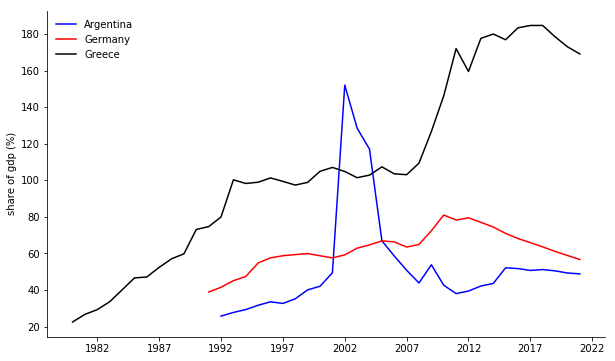

In [340]:
weo.index = pd.to_datetime(weo.index)


fig, ax = plt.subplots(figsize=(10,6))

ax.plot(weo.index, weo['ARG', 'Debt'], color='blue', label = 'Argentina')
ax.plot(weo.index, weo['DEU', 'Debt'], color='red', label = 'Germany')
ax.plot(weo.index, weo['GRC', 'Debt'], color='black', label = 'Greece')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_ylabel('share of gdp (%)')

ax.legend(frameon=False)

plt.show()

Wow, Greece has had an interesting run. Let's look at Greece more closely. 
8. Create a (2,1) grid of subplots. Plot Greece's surplus in the top axes and debt in the bottom axis. Make it look nice.

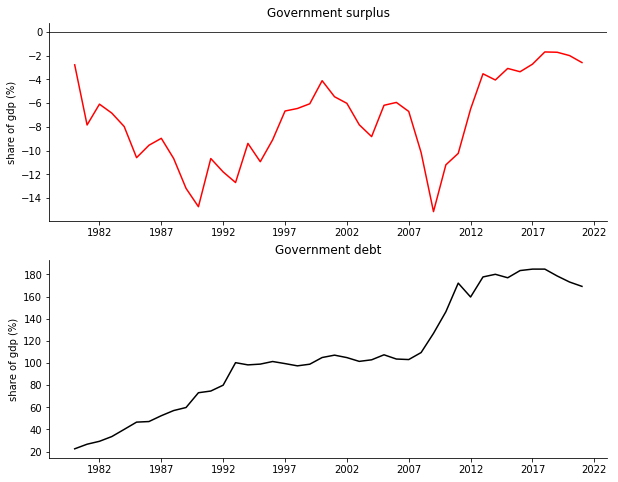

In [339]:
fig, ax = plt.subplots(2,1, figsize=(10,8))


ax[0].plot(weo.index, weo['GRC', 'Surplus'], color='red', label = 'Germany')
ax[0].set_title('Government surplus')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_ylabel('share of gdp (%)')
ax[0].axhline(y=0, color='black', linewidth=0.75)


ax[1].plot(weo.index, weo['GRC', 'Debt'], color='black', label = 'Greece')
ax[1].set_title('Government debt')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_ylabel('share of gdp (%)')

plt.show()